In [3]:
import pandas as pd

df=pd.read_csv('https://assets.datacamp.com/production/course_1550/datasets/mlb_nohitters.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
date               294 non-null int64
game_number        294 non-null int64
winning_team       228 non-null object
losing_team        228 non-null object
winning_pitcher    228 non-null object
dtypes: int64(2), object(3)
memory usage: 11.6+ KB


In [5]:
df.tail()

,date,game_number,winning_team,losing_team,winning_pitcher
289,20150725,210250,PHI,CHN,Cole Hamels
290,20150812,210490,SEA,BAL,Hisashi Iwakuma
291,20150821,210610,HOU,LAN,Michael Fiers
292,20150830,210740,CHN,LAN,Jake Arrieta
293,20151003,211208,WAS,NYN,Max Scherzer


In [6]:
nohitter_times=[ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467]

In [11]:
import numpy as np
nohitter_times=np.array(nohitter_times)
nohitter_times

array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  3

## How often do we get no hitters?

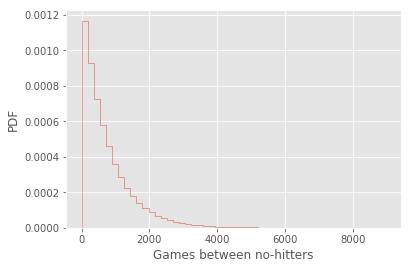

In [7]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

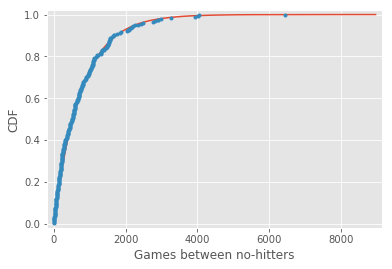

In [8]:
def ecdf(data):
  n=len(data)
  x=np.sort(data)
  y=np.arange(1,n+1)/n
  return x, y

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker = '.', linestyle = 'none' )

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

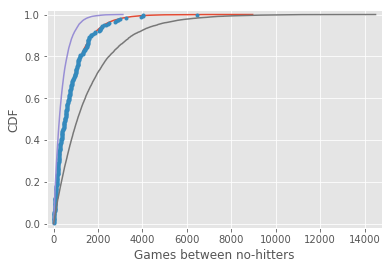

In [9]:

np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)


# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)
# Show the plot
plt.show()

In [10]:
import pandas as pd
df=pd.read_csv('https://assets.datacamp.com/production/course_1550/datasets/female_literacy_fertility.csv')

In [11]:
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [12]:
fertility=np.array(df['fertility'].tolist())
illiteracy=np.array((100-df['female literacy']).tolist())

In [13]:
fertility

array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
      

In [14]:
illiteracy

array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,

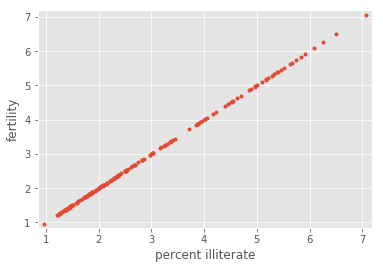

0.804132402682


In [15]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Plot the illiteracy rate versus fertility
_ = plt.plot(fertility, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


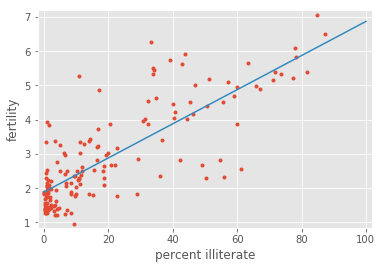

In [16]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


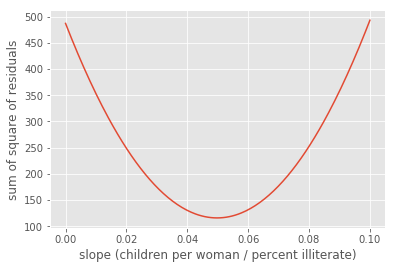

In [17]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility  - a * illiteracy   - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

0.500090909091 3.00009090909


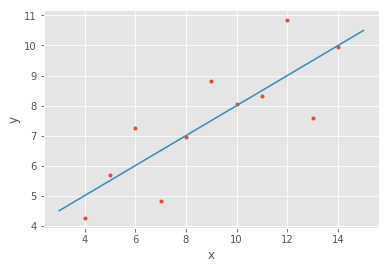

In [18]:

x=[ 10,   8, 13,   9,  11,  14,   6,   4,  12,   7,   5]
y=[  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,  10.84,   4.82,
       5.68]

a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y,marker='.',linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


In [19]:
anscombe_x=[np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]), np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]), np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]), np.array([  8.,   8.,   8.,   8.,   8.,   8.,   8.,  19.,   8.,   8.,   8.])]
anscombe_y=[np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
        10.84,   4.82,   5.68]), np.array([ 9.14,  8.14,  8.74,  8.77,  9.26,  8.1 ,  6.13,  3.1 ,  9.13,
        7.26,  4.74]), np.array([  7.46,   6.77,  12.74,   7.11,   7.81,   8.84,   6.08,   5.39,
         8.15,   6.42,   5.73]), np.array([  6.58,   5.76,   7.71,   8.84,   8.47,   7.04,   5.25,  12.5 ,
         5.56,   7.91,   6.89])]
# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.500090909091 intercept: 3.00009090909
slope: 0.5 intercept: 3.00090909091
slope: 0.499727272727 intercept: 3.00245454545
slope: 0.499909090909 intercept: 3.00172727273


In [20]:
import numpy as np
rainfall=np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

In [21]:
rainfall

array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   83

In [22]:
bs_sample = np.random.choice(rainfall, size=len(rainfall))
bs_sample

array([  876.6,   648.2,   864.2,   866.8,   798.1,   898.8,   701.2,
         770.4,   898.8,   960.4,   710.6,   618.4,   713.2,   661.3,
         683.9,   789.3,   998.1,   840.7,   940.6,   985.7,   944.7,
         736.8,   736.6,  1038.5,   774.2,   856.9,  1146.4,   948.8,
         883.9,   710.6,   789.3,  1146.4,   774.2,   823.9,   847.9,
         689.1,   674.2,   925.4,   789.6,   771.1,   774.3,   876.6,
         809.4,   789.3,   701.2,   904.2,   578.3,   789.3,   774.5,
         730.1,   802.7,   864.2,   964.4,   761.3,   969. ,   774. ,
         940.6,   626.8,   905.1,   983.8,   967.1,   689.1,   689.1,
         789.6,   643.3,  1035.2,   909.7,   681.1,   654.9,   970.6,
         736.6,   970.6,   734.5,   789.6,   491.1,   728.2,   808.6,
         674.2,   983.8,   831.8,   646.8,   882.1,   803.4,   960.4,
         906.2,   880.2,   619. ,   694.5,   718. ,   718. ,   877.8,
         681.8,   646.8,   944.7,   865.6,   712.5,   940.3,   831.5,
         740.1,   94

In [23]:
np.sum(rainfall-bs_sample)/len(rainfall)

-10.703759398496242

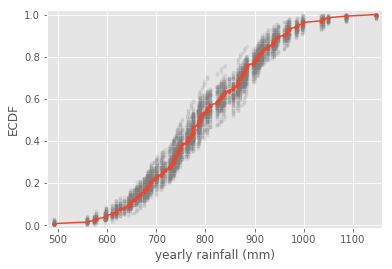

In [24]:
def ecdf(data):
  n=len(data)
  x=np.sort(data)
  y=np.arange(1,n+1)/n
  return x, y

from matplotlib import pyplot as plt

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample) 
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


In [4]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

10.5105491505
10.5580450969


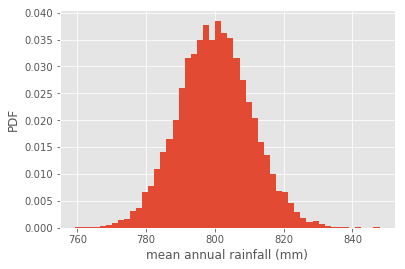

In [26]:

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.mean,10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50,normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [27]:
print(np.percentile(bs_replicates,97.5))
print(np.percentile(bs_replicates,2.5))

821.026503759
779.445733083


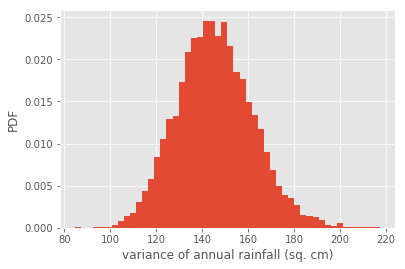

In [28]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.var,10000)

# Put the variance in units of square centimeters
bs_replicates=bs_replicates/100
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50,normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [29]:
nohitter_times

[843,
 1613,
 1101,
 215,
 684,
 814,
 278,
 324,
 161,
 219,
 545,
 715,
 966,
 624,
 29,
 450,
 107,
 20,
 91,
 1325,
 124,
 1468,
 104,
 1309,
 429,
 62,
 1878,
 1104,
 123,
 251,
 93,
 188,
 983,
 166,
 96,
 702,
 23,
 524,
 26,
 299,
 59,
 39,
 12,
 2,
 308,
 1114,
 813,
 887,
 645,
 2088,
 42,
 2090,
 11,
 886,
 1665,
 1084,
 2900,
 2432,
 750,
 4021,
 1070,
 1765,
 1322,
 26,
 548,
 1525,
 77,
 2181,
 2752,
 127,
 2147,
 211,
 41,
 1575,
 151,
 479,
 697,
 557,
 2267,
 542,
 392,
 73,
 603,
 233,
 255,
 528,
 397,
 1529,
 1023,
 1194,
 462,
 583,
 37,
 943,
 996,
 480,
 1497,
 717,
 224,
 219,
 1531,
 498,
 44,
 288,
 267,
 600,
 52,
 269,
 1086,
 386,
 176,
 2199,
 216,
 54,
 675,
 1243,
 463,
 650,
 171,
 327,
 110,
 774,
 509,
 8,
 197,
 136,
 12,
 1124,
 64,
 380,
 811,
 232,
 192,
 731,
 715,
 226,
 605,
 539,
 1491,
 323,
 240,
 179,
 702,
 156,
 82,
 1397,
 354,
 778,
 603,
 1001,
 385,
 986,
 203,
 149,
 576,
 445,
 180,
 1403,
 252,
 675,
 1351,
 2983,
 1568,
 45,
 899,

95% confidence interval = [ 662.88336653  873.15278884] games


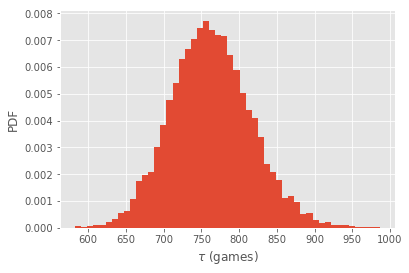

In [30]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times ,np.mean,10000)

# Compute the 95% confidence interval: conf_int
conf_int =np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Pair bootstrap function

In [31]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size) 
    bs_intercept_reps = np.empty(size) 

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

[ 0.04425912  0.05525558]


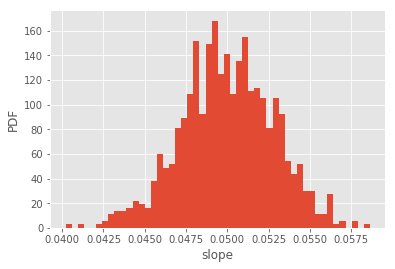

In [34]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps,[2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

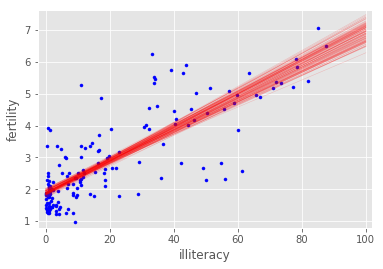

In [36]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])
# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red' )

# Plot the data
_ = plt.scatter(illiteracy,fertility,marker='.',color='blue')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

In [15]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1): ]

    return perm_sample_1, perm_sample_2

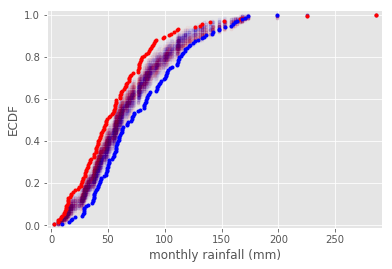

In [39]:
rain_july=np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])
rain_november=np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july,rain_november) 


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [14]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [49]:
import seaborn as sns
# Make bee swarm plot
_ = sns.swarmplot(x='ID',y='impact_force',data=df) 

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

SyntaxError: invalid syntax (<ipython-input-49-46caa05ef8e9>, line 2)

In [7]:
force_a=np.array([ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ])

In [8]:
force_b=np.array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

In [16]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means ) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0049


## One sample Bootstrap hypothesis test

In [2]:
import numpy as np
force_b=np.array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

In [5]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = (force_b-np.mean(force_b)+0.55)

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0047


In [17]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a,force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)
for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat , size=len(forces_concat ))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_b):])

# Compute and print p-value: p
p =np.sum(bs_replicates >= empirical_diff_means ) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0064


In [18]:
# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a-bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means ) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0051
